In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

import Deconfuso

%matplotlib notebook

zdi_data = Table.read("../zdi_data/MasterTable_ZDI.csv",format='csv')


In [2]:
mass = zdi_data[1][:]
period = zdi_data[2][:]
rossby = zdi_data[3][:]
B2 = zdi_data[6][:]
Bfield = zdi_data[7][:]
poloidal = zdi_data[8][:]
dipole = zdi_data[9][:]
quad = zdi_data[10][:]
octo = zdi_data[11][:]
axisym = zdi_data[12][:]

(<Figure size 273.24x186.3 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f284ef0>)

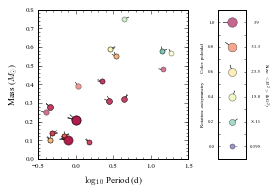

In [3]:
#NotchPlot(xin,yin,colin,areain,rotin)
Deconfuso.Deconfusogram(np.log10(period),mass,poloidal,B2,axisym,file='../plots/Deconfuso_01.pdf',
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.5,1.5],ylims=[0,0.8])

(<Figure size 273.24x186.3 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f63e6d8>)

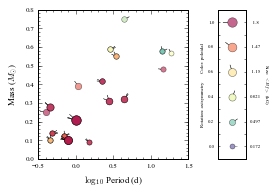

In [4]:
Deconfuso.Deconfusogram(np.log10(period),mass,poloidal,Bfield,axisym,file='../plots/Deconfuso_02.pdf',arealabel="Size: $<Bf>$ (kG)",
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.5,1.5],ylims=[0,0.8])

(<Figure size 273.24x186.3 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f88e2e8>)

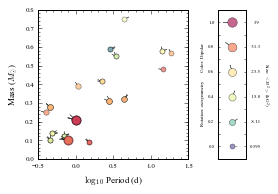

In [6]:
Deconfuso.Deconfusogram(np.log10(period),mass,dipole,B2,axisym,file='../plots/Deconfuso_03.pdf',collabel="Rotation: axisymmetry       Color: Dipolar",
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.5,1.5],ylims=[0,0.8])